# <a id='toc1_'></a>[Introduction to Optimization and The Efficient Frontier](#toc0_)
2nd week, 1st section, Introduction to Portfolio Construction and Analysis with Python.
Vijay Vaidyanathan & Lionel Martellini.  
Notes and code written by Benoît MARION.

**Table of contents**<a id='toc0_'></a>    
- [Introduction to Optimization and The Efficient Frontier](#toc1_)    
  - [Lecture 1 - The only free lunch in finance](#toc1_1_)    
  - [Lecture 2 - Markowitz Optimization and the Efficient Frontier](#toc1_2_)    
  - [Lecture 3 - Applying Quadprog to draw the efficient frontier](#toc1_3_)    
  - [Lab 1 - Intro to the Efficient Frontier 2](#toc1_4_)    
    - [Importing our toolkit and the data.](#toc1_4_1_)    
    - [Applying the past functions to this new dataset](#toc1_4_2_)    
    - [Efficient frontier - beginning](#toc1_4_3_)    
  - [Lab 2 - Intro to the Efficient Frontier 2](#toc1_5_)    
    - [Importing our toolkit and the data.](#toc1_5_1_)    
    - [Obtaining the return & coviance of a portfolio](#toc1_5_2_)    
    - [Two asset frontier](#toc1_5_3_)    
  - [Lab 3 - Quadprog to draw the efficient frontier](#toc1_6_)    
    - [Importing our toolkit and the data.](#toc1_6_1_)    
    - [Creating a minimizing function for a given level of return](#toc1_6_2_)    
    - [Applying it to the plotting function and getting the optimized weights in the N-asset scenario](#toc1_6_3_)  

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Lecture 1 - The only free lunch in finance](#toc0_)
The objective of this class is to understand the behaviour of a portfolio which a combination of different assets. 
The return is simply the weighted average of the returns of the differents assets, but the volatility depends also on the correlation of the two assets:
$$ R(w_a,w_b)=w_a \times R_a + w_b \times R_b $$
$$ \sigma^2(w_a,w_b)=\sigma^2_a w_a^2 + \sigma^2_b w_b^2 +2w_aw_b\sigma_a \sigma_b \rho_{a,b} $$
  
The consequence of this is that a combination of two assets might be of a lower risk that both of them if they are not perfectly corelated, but with higher returns than one of them. The objective behind portfolio construction is to allocate between asset to obtain this smallest risk due to unperfect correlation while maximizing returs.
  
Portfolio managers of refer as this statement the "only free lunch in whole finance".

## <a id='toc1_2_'></a>[Lecture 2 - Markowitz Optimization and the Efficient Frontier](#toc0_)

By adding a third asset, the space of the possible combinations shifts from a curve to a region (area) representing the different weights allocated to each asset. This allow us to obtain new risk-reward combination and a whole set of possible portfolios.

The area made by the combination of different assets has an edge which can be defined as the efficient frontier. It is the curve where a rational investor can't change its portfolio except by having higher volatility or lower returns.

The objective of portfolio construction is to be on this efficient frontier to maximize utility, but it is harder in practice than one may think.

## <a id='toc1_3_'></a>[Lecture 3 - Applying Quadprog to draw the efficient frontier](#toc0_)
To obtain the region of possible combinations and the frontier, we have to use an optimizer that takes returns and volatility as an input. 
More precisely the optimizer minimizes the variance of the portfolio for a given level of returns (with positive weights adding up to 1). So it will give us the differents weighted portfolios on the efficient frontier.


## <a id='toc1_4_'></a>[Lab 1 - Intro to the Efficient Frontier 2](#toc0_)

### <a id='toc1_4_1_'></a>[Importing our toolkit and the data.](#toc0_)

In [1]:
import add_doc_path

In [4]:
import pandas as pd
ind=pd.read_csv("https://raw.githubusercontent.com/z4ir3/finance-courses/master/data/ind30_m_vw_rets.csv",
              header=0, index_col=0, parse_dates=True)/100
ind.index= pd.to_datetime(ind.index, format="%Y%m").to_period()
ind.columns=ind.columns.str.strip()
#ind.to_csv("~/Desktop/ind30_m_vw_rets.csv")
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [2]:
import finance_pkg.Edhec_risk_kit as erk
ind=erk.get_ind_returns()

### <a id='toc1_4_2_'></a>[Applying the past functions to this new dataset](#toc0_)

We should be able to use all our old functions on this new dataset, let's check that:

<AxesSubplot: >

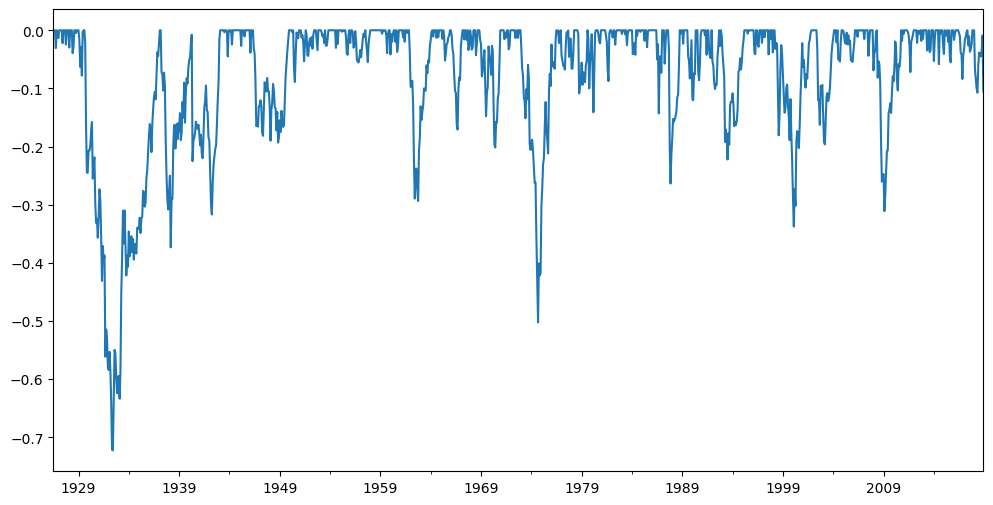

In [3]:
erk.drawdowns(ind['Food'])['drawdowns'].plot.line(figsize=(12,6))

In [8]:
erk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [9]:
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot: >

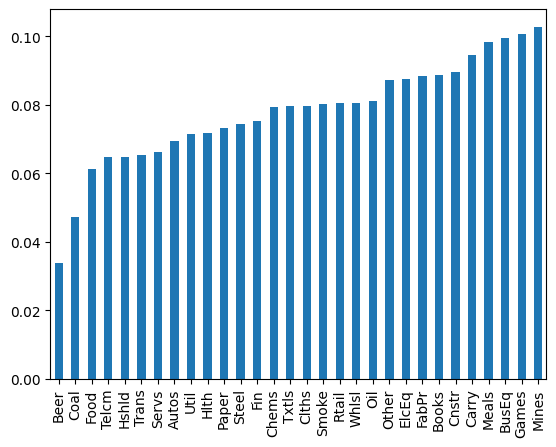

In [4]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar()

<AxesSubplot: title={'center': 'Industry Sharpe Ratios (1926-2018)'}>

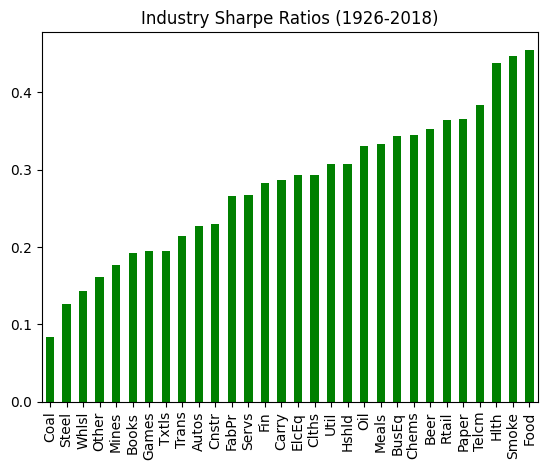

In [14]:
erk.sharpe_ratio(ind, riskfree_rate=0.03,periods_per_year=12).sort_values().plot.bar(title="Industry Sharpe Ratios (1926-2018)", color="green")

<AxesSubplot: title={'center': 'Industry Sharpe Ratios (2000-2018)'}>

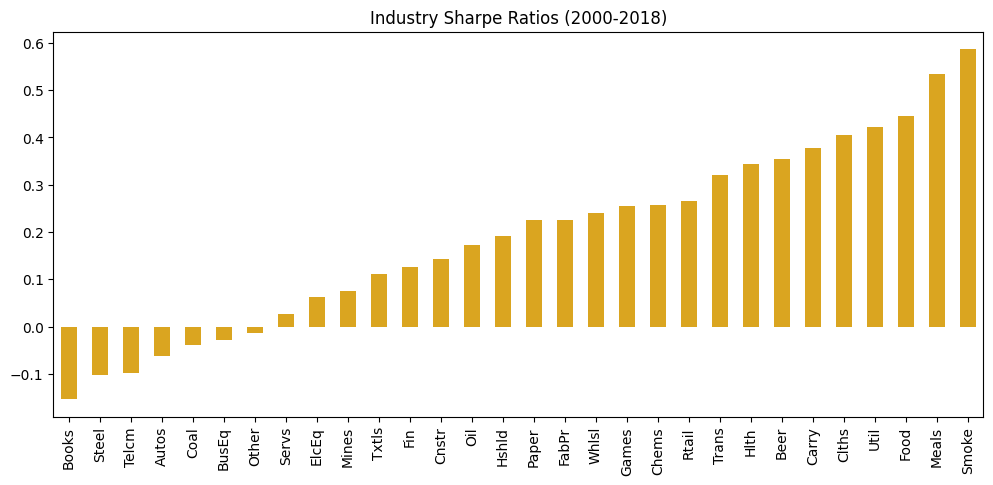

In [16]:
erk.sharpe_ratio(ind["2000":], riskfree_rate=0.03,periods_per_year=12).sort_values().plot.bar(title="Industry Sharpe Ratios (2000-2018)", figsize=(12,5),color="goldenrod")

### <a id='toc1_4_3_'></a>[Efficient frontier - beginning](#toc0_)

To obtain the efficient frontier, we need to have the expected volatility, return and covariance. As we don't know how to forecast we will do an in-sample exercise: computing the efficent frontier in the past.

<AxesSubplot: >

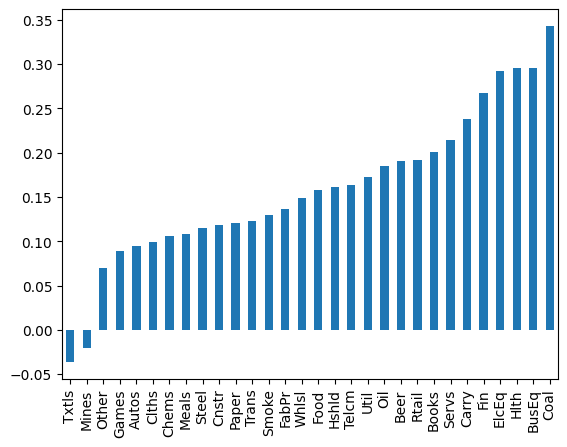

In [24]:
er=erk.annualize_rets(ind["1995":"2000"],12)
er.sort_values().plot.bar()

In [26]:
cov=ind["1995":"2000"].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


## <a id='toc1_5_'></a>[Lab 2 - Intro to the Efficient Frontier 2](#toc0_)

### <a id='toc1_5_1_'></a>[Importing our toolkit and the data.](#toc0_)

In [1]:
import add_doc_path
import finance_pkg.Edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [2]:
ind=erk.get_ind_returns()
er=erk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

### <a id='toc1_5_2_'></a>[Obtaining the return & coviance of a portfolio](#toc0_)

Functions that have been added to our toolkit:
```python

def portfolio_return(weights, returns):
    """Weights --> returns

    Args:
        weights (_type_): _description_
        returns (_type_): _description_
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """Weights --> volatility

    Args:
        weights (_type_): _description_
        covmat (_type_): _description_
    """
    return (weights.T @ covmat @ weights)**0.5
```

We choose 4 assets in the list of all industries to have a simpler example and get the returns and variance:

In [4]:
l=["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [6]:
cov.loc[l, l] ## get the sub-matrix

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


As an example, we get equal weight for each asset and compute return and volatility:

In [18]:
weights=np.repeat(0.25,4) 
erk.portfolio_return(returns=er[l],weights=weights)

0.19511097196038385

In [13]:
erk.portfolio_vol(weights,cov.loc[l,l])

0.055059195776437045

### <a id='toc1_5_3_'></a>[Two asset frontier](#toc0_)

Lets get 20 points that are different combinations of the 2 assets (games and financial) that we will use as weights:

In [25]:
l=["Games","Fin"]

In [26]:
n_points=20
weights=[np.array([w, 1-w] )for w in np.linspace(0,1,n_points)] 
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<AxesSubplot: xlabel='Vol', ylabel='R'>

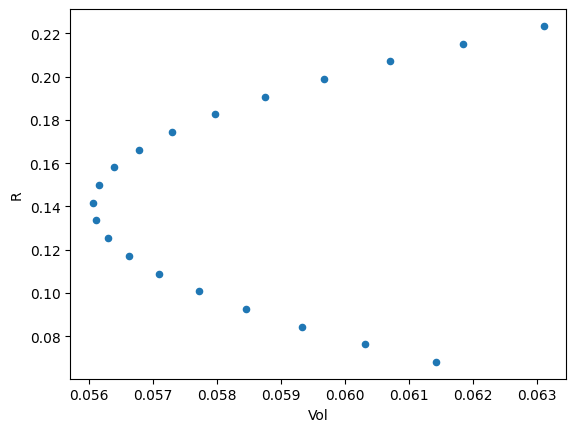

In [28]:
rets=[erk.portfolio_return(w, er[l]) for w in weights]
vols=[erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef= pd.DataFrame({'R':rets, "Vol":vols})
ef.plot.scatter(x="Vol",y="R")

We created a function to plot directly in the case of 2-asset.

<AxesSubplot: xlabel='Volatility'>

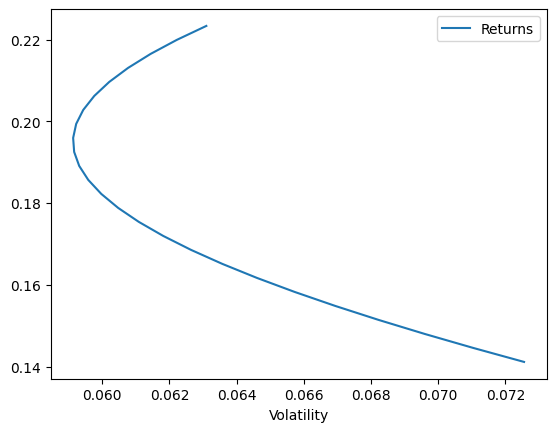

In [12]:
l=["Fin","Beer"]
erk.plot_ef2(25,er[l],cov.loc[l,l],style=("-"))

## <a id='toc1_6_'></a>[Lab 3 - Quadprog to draw the efficient frontier](#toc0_)

### <a id='toc1_6_1_'></a>[Importing our toolkit and the data.](#toc0_)

In [1]:
import add_doc_path
import finance_pkg.Edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [2]:
ind=erk.get_ind_returns()
er=erk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

### <a id='toc1_6_2_'></a>[Creating a minimizing function for a given level of return](#toc0_)

Now we want to get the N-asset frontier, but the big issue it to get the weights that are on the frontier for n-asset (the rest of the function stays the same). We need an optimizer that will come from the scipy package. We built this function that we've added to the tool_kit, it get the desired return as an input and computes the combination of assets in er that gives this return while minimizing risks:
```python
def minimize_vol(target_return, er, cov):
    """target_return --> weight vector
    Args:
        target_return (float): return desired
        er (pd.Series): Returns
        cov (pd.DataFrame): Covariance Matrix
    """
    n=er.shape[0]
    init_guess=np.repeat(1/n,n)
    bounds=((0.0, 1.0),)*n
    return_is_target={
       'type':'eq',
       'args':(er,),
       'fun': lambda weights, er: target_return-portfolio_return(weights,er)
    }
    weights_sum_to_1={
        'type':'eq',
        'fun': lambda weights: np.sum(weights)-1 
    }
    results=minimize(portfolio_vol,
                     init_guess,args=(cov,), 
                     method="SLSQP", 
                     options={'disp':False},
                     constraints=(return_is_target,weights_sum_to_1),
                     bounds=bounds
                     )
    return results.x


In [3]:
l=["Games","Fin"]
w15=erk.minimize_vol(.15,er[l],cov.loc[l,l])
vol15=erk.portfolio_vol(w15,cov.loc[l,l])
print(vol15,w15)

0.056163669406706564 [0.47287631 0.52712369]


So for a given return, the program computes the weight associated to minimize volatility and the values for a 2-asset scenario seem to be matching.

### <a id='toc1_6_3_'></a>[Applying it to the plotting function and getting the optimized weights in the N-asset scenario](#toc0_)

We have built a function that should plot the efficient frontier in the n-asset case, let's try it:

<AxesSubplot: xlabel='Volatility'>

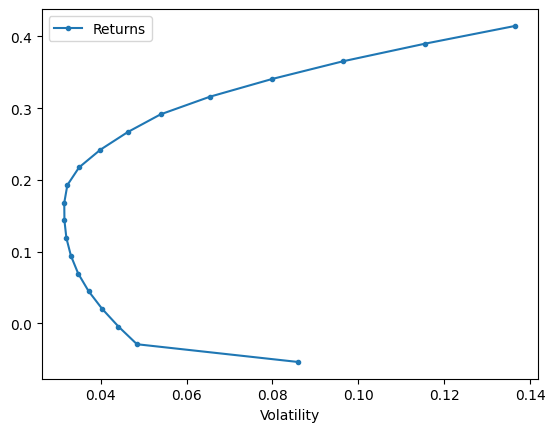

In [8]:
erk.plot_ef(20,er,cov)

For instance, if we had the choice to invest in all these assets and wanted a 20% annual return we should have invested at the following weights:

In [12]:
w20_n=erk.minimize_vol(.20,er,cov)
vol20_n=erk.portfolio_vol(w20_n,cov)
print(vol20_n,w20_n)

0.0353598469445171 [8.97972984e-18 0.00000000e+00 0.00000000e+00 3.99887935e-18
 0.00000000e+00 0.00000000e+00 4.52571919e-18 2.97760716e-01
 3.19348686e-18 2.05735382e-18 6.78245523e-18 0.00000000e+00
 8.85598321e-18 4.70197683e-02 0.00000000e+00 0.00000000e+00
 1.30378943e-17 6.47638755e-02 1.67447667e-17 3.33094771e-01
 0.00000000e+00 2.11296026e-17 7.66127206e-02 2.15024473e-18
 0.00000000e+00 5.21210865e-19 1.80748149e-01 0.00000000e+00
 0.00000000e+00 4.95007623e-18]


In [23]:
w20_n=pd.DataFrame(w20_n).round(2)
w20_n.index=er.index
w20_n


,0
Food,0.00
Beer,0.00
Smoke,0.00
Games,0.00
Books,0.00
Hshld,0.00
Clths,0.00
Hlth,0.30
Chems,0.00
Txtls,0.00
